In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas_datareader as pdr
import datetime as dt
import numpy as np
import matplotlib.dates as mdates
import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import TransformedTargetRegressor



In [4]:
btc = pd.read_csv('BTC-2.csv',thousands=',')
stocks = pd.read_csv('Nasdaq.csv',thousands=',')

<IPython.core.display.Javascript object>


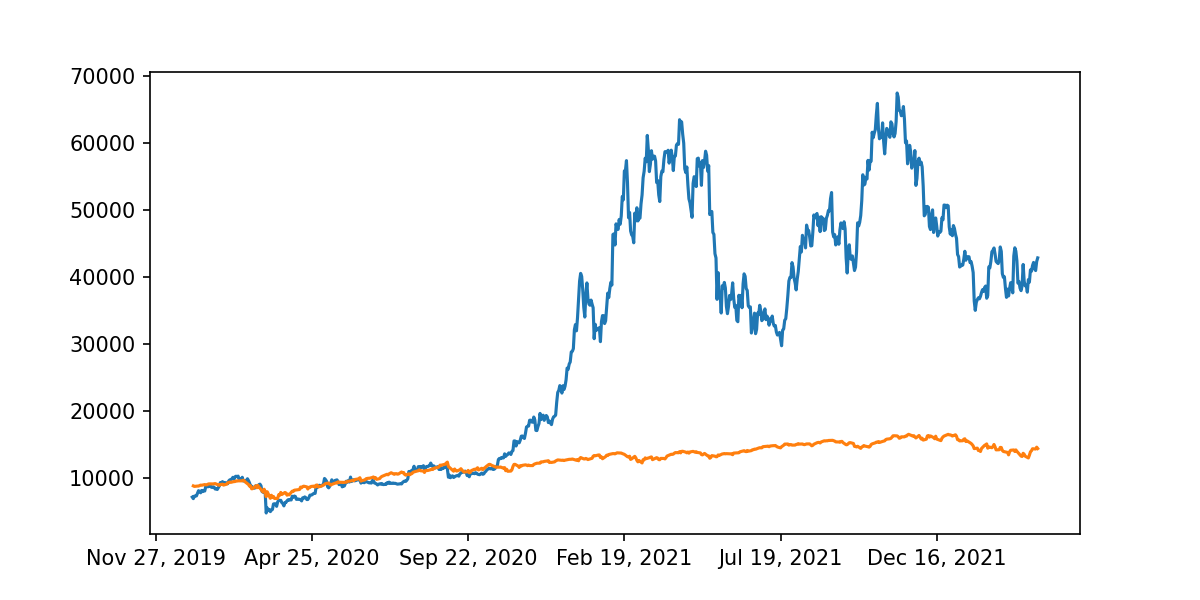

In [22]:
timeArray = btc['Date']
fmt = mdates.DateFormatter("%b %d, %Y")
timeArray = [datetime.datetime.strptime(i, "%b %d, %Y") for i in timeArray]

fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=200)) 
plt.plot(timeArray,btc['Price'], label='Bitcoin')
ax.xaxis.set_major_formatter(fmt)

timeArray = stocks['Date']
fmt = mdates.DateFormatter("%b %d, %Y")
timeArray = [datetime.datetime.strptime(i, "%b %d, %Y") for i in timeArray]

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=150)) 
plt.plot(timeArray,stocks['Price'],label='Nasdaq')
# ax.xaxis.set_major_formatter(fmt)

<IPython.core.display.Javascript object>


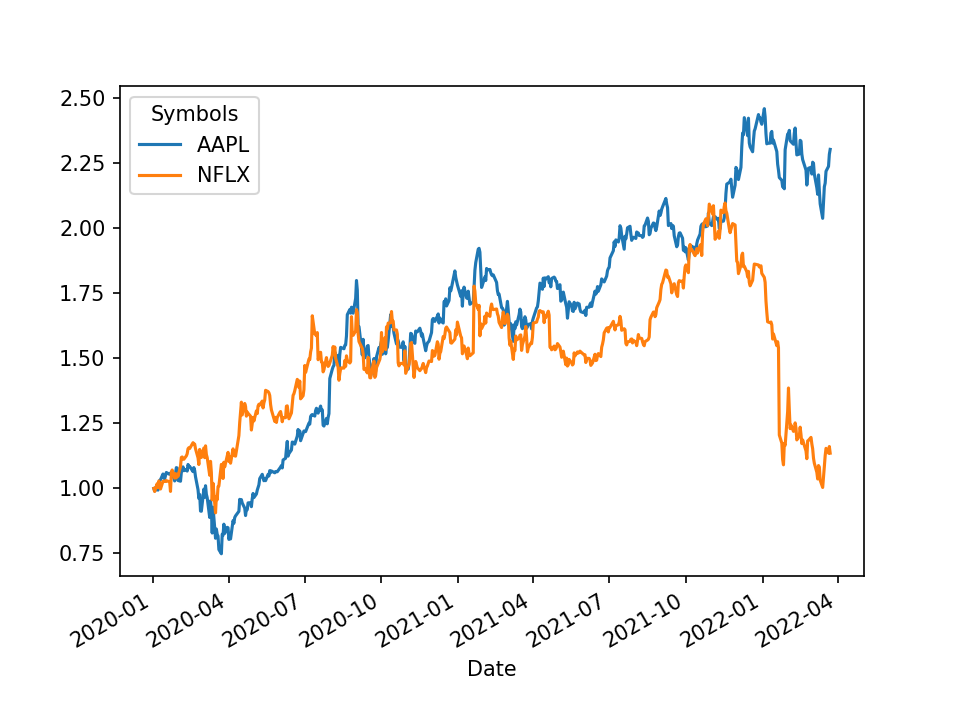

In [19]:
final_df= pd.merge(btc, stocks, on='Date', how='inner')
print(final_df.head(10))
# sns.regplot(x=final_df['Price_x'], y=final_df['Price_y'])

# extract x and y from dataframe data
x = final_df['Price_y']
y = final_df['Price_x']

# Creating training and test data
train_pct_index = int(0.8 * len(final_df))
X_train, X_test = x[train_pct_index:], x[:train_pct_index]
Y_train, Y_test = y[train_pct_index:], y[:train_pct_index]


# # create the model
# model = LinearRegression()

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)


for j in range(Y_test.shape[0]):
    Y_test[j] = Y_test[j]/100
    

    
print(type(Y_test))

# # # fit the mode
# model.fit(X_train, Y_train)
# Y_pred = model.predict(X_test)  # make predictions
# score=model.score(X_test,Y_test)
# print(score)
# s=0

    
# print(s/Y_pred.shape[0])
# plt.scatter(x, y)
# plt.plot(x, Y_pred, color='red')
# plt.show()


           Date  Price_x   Open_x   High_x    Low_x   Vol._x Change %_x  \
0  Mar 23, 2022  42912.0  42373.0  43027.0  41795.0  433.96M      1.27%   
1  Mar 22, 2022  42373.0  41022.0  43327.9  40893.0  537.06M      3.29%   
2  Mar 21, 2022  41022.0  41282.0  41532.0  40530.0  406.62M     -0.62%   
3  Mar 18, 2022  41767.8  40914.6  42308.4  40234.8    2.31B      2.08%   
4  Mar 17, 2022  40914.8  41118.7  41406.0  40557.8    1.90B     -0.50%   
5  Mar 16, 2022  41118.7  39282.5  41701.6  38953.2    4.47B      4.67%   
6  Mar 15, 2022  39285.7  39673.0  39854.7  38220.9    2.25B     -0.97%   
7  Mar 14, 2022  39671.1  37789.5  39914.3  37613.6    2.33B      4.97%   
8  Mar 11, 2022  38730.2  39422.5  40177.0  38236.4    2.79B     -1.74%   
9  Mar 10, 2022  39416.3  41933.9  42029.1  38603.5    3.62B     -5.99%   

    Price_y    Open_y    High_y     Low_y   Vol._y Change %_y  
0  14447.54  14525.22  14680.57  14446.66  226.67M     -1.41%  
1  14654.33  14396.03  14688.42  14386.47  234